In [1]:
!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()
df

""


In [4]:
df["X1"] = [1,2,3,4,5,6,6,7,9,9]
df["X2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

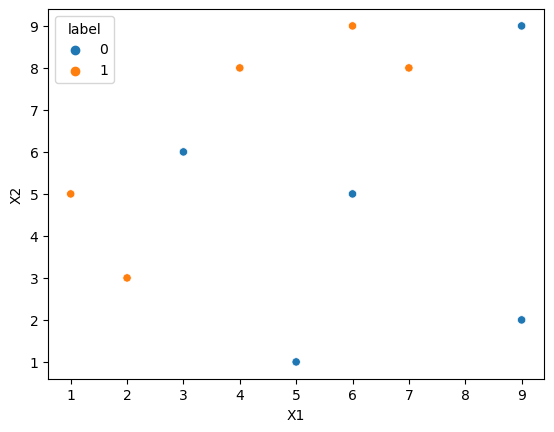

In [7]:
sns.scatterplot(data=df,x='X1',y='X2',hue='label')

In [8]:
df['sample_weight'] = 1/df.shape[0]


In [9]:
df

,X1,X2,label,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
dt1

DecisionTreeClassifier(max_depth=1)

In [12]:
X = df.iloc[:,0:2]

In [13]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y = df['label']

In [15]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [16]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [17]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

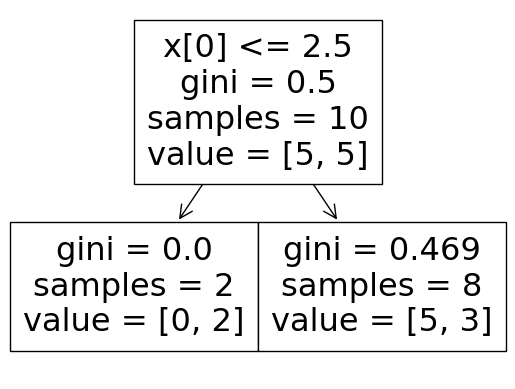

In [18]:
plot_tree(dt1)

In [19]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [20]:
X = np.array(X)

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

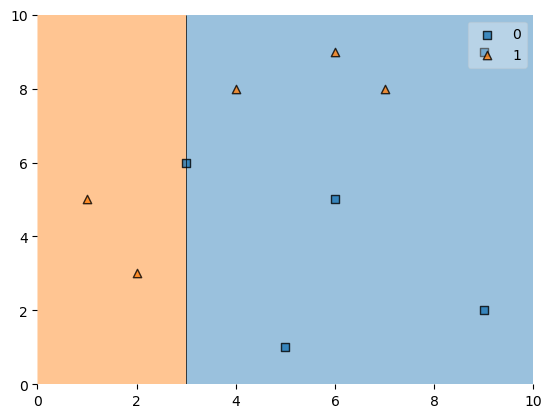

In [21]:
plot_decision_regions(np.array(X),np.array(y),clf=dt1,legend=True)

In [22]:
df['y_pred'] = dt1.predict(X)
df

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,X1,X2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [23]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [24]:
alpha1 = calculate_model_weight(0.3)

In [25]:
alpha1 # performance of stump

0.42364893019360184

In [26]:
# calculate updated weight

In [27]:
def update_row_weight(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [28]:
df['updated_weight'] = df.apply(update_row_weight,axis=1 )

In [29]:
df

,X1,X2,label,sample_weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [30]:
def normalise_row_weight(row):
    return row['updated_weight']/df['updated_weight'].sum()

In [31]:
df['normalised_weights'] = df.apply(normalise_row_weight,axis=1)

In [32]:
df

,X1,X2,label,sample_weight,y_pred,updated_weight,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [33]:
df['normalised_weights'].sum()

1.0

In [34]:
df['cumsum_upper'] = np.cumsum(df['normalised_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weights']


In [35]:
df[['X1','X2','label','sample_weight','y_pred','updated_weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,sample_weight,y_pred,updated_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [36]:
# random sampling for next Decision tree 
# generating 10 random weights

indexes = []

for i in range(df.shape[0]):
    a = np.random.random() # random values between 0 to 1
#     print(a)
    for index,row in df.iterrows():
        #print(index,row)
        if (a>row['cumsum_lower']) and (a<row['cumsum_upper']):
            indexes.append(index)
            

In [37]:
indexes # rows that we will pass to our next decision tree

[4, 0, 7, 4, 2, 5, 1, 5, 8, 5]

In [38]:
df.iloc[indexes]

,X1,X2,label,sample_weight,y_pred,updated_weight,normalised_weights,cumsum_upper,cumsum_lower
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458


In [39]:
second_df = df.iloc[indexes][['X1','X2','label','sample_weight']]

In [40]:
second_df

,X1,X2,label,sample_weight
4,5,1,0,0.1
0,1,5,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [41]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [42]:
X = second_df.iloc[:,:2]
y = second_df['label']

In [43]:
X

,X1,X2
4,5,1
0,1,5
7,7,8
4,5,1
2,3,6
5,6,9
1,2,3
5,6,9
8,9,9
5,6,9


In [44]:
y

4    0
0    1
7    1
4    0
2    0
5    1
1    1
5    1
8    0
5    1
Name: label, dtype: int64

In [45]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]')]

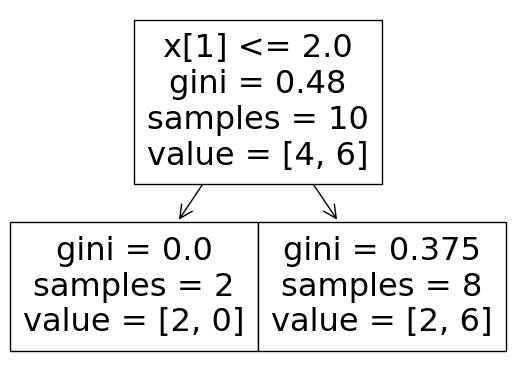

In [46]:
plot_tree(dt2)

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

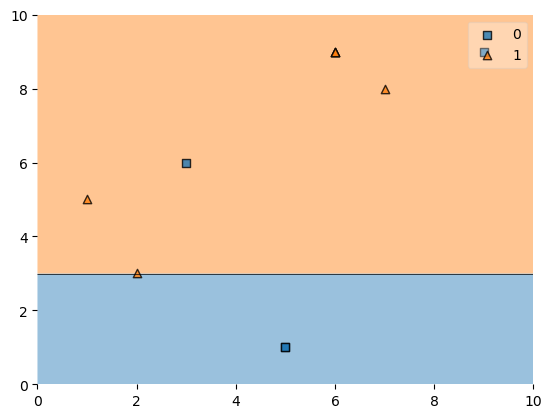

In [47]:
plot_decision_regions(np.array(X),np.array(y),clf=dt2,legend=True)

In [48]:
dt2.predict(X)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [49]:
second_df['y_pred'] = dt2.predict(X)

In [50]:
second_df

,X1,X2,label,sample_weight,y_pred
4,5,1,0,0.1,0
0,1,5,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,1


In [53]:
alpha2 = calculate_model_weight(0.2)

In [54]:
alpha2

0.6931471805599453

In [55]:
def update_row_weight(row,alpha=0.693):
    if row['label'] == row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [56]:
second_df['updated_weight'] = second_df.apply(update_row_weight,axis=1)

In [57]:
second_df

,X1,X2,label,sample_weight,y_pred,updated_weight
4,5,1,0,0.1,0,0.050007
0,1,5,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
4,5,1,0,0.1,0,0.050007
2,3,6,0,0.1,1,0.199971
5,6,9,1,0.1,1,0.050007
1,2,3,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
8,9,9,0,0.1,1,0.199971
5,6,9,1,0.1,1,0.050007


In [63]:
def normalise_row_weight(row):
    return row['updated_weight']/second_df['updated_weight'].sum()

In [64]:
second_df['normalised_weights'] = second_df.apply(normalise_row_weight,axis=1)

In [65]:
second_df

,X1,X2,label,sample_weight,y_pred,updated_weight,normalised_weights
4,5,1,0,0.1,0,0.050007,0.062509
0,1,5,1,0.1,1,0.050007,0.062509
7,7,8,1,0.1,1,0.050007,0.062509
4,5,1,0,0.1,0,0.050007,0.062509
2,3,6,0,0.1,1,0.199971,0.249963
5,6,9,1,0.1,1,0.050007,0.062509
1,2,3,1,0.1,1,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509
8,9,9,0,0.1,1,0.199971,0.249963
5,6,9,1,0.1,1,0.050007,0.062509


In [66]:
second_df['normalised_weights'].sum()

1.0

In [67]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalised_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalised_weights']


In [69]:
second_df[['X1','X2','label','sample_weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,sample_weight,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0.000000,0.062509
0,1,5,1,0.1,0.062509,0.125018
7,7,8,1,0.1,0.125018,0.187528
4,5,1,0,0.1,0.187528,0.250037
2,3,6,0,0.1,0.250037,0.500000
5,6,9,1,0.1,0.500000,0.562509
1,2,3,1,0.1,0.562509,0.625018
5,6,9,1,0.1,0.625018,0.687528
8,9,9,0,0.1,0.687528,0.937491
5,6,9,1,0.1,0.937491,1.000000


In [76]:
indexes = []
for i in range(second_df.shape[0]):
    a = np.random.random()
    print(a)
    for index,row in second_df.iterrows():
        if (a<row['cumsum_upper']) and (a>row['cumsum_lower']):
            indexes.append(index)
        

0.9575005184846022
0.5078470514818935
0.06737230698482854
0.812481114427789
0.5516619922490663
0.515510539578072
0.14263149416903464
0.04593352823495689
0.49954762437475375
0.7717041369036769


In [77]:
indexes

[5, 5, 0, 8, 5, 5, 7, 4, 2, 8]

In [81]:
third_df = second_df.iloc[indexes]
third_df # will pass to the next stump

,X1,X2,label,sample_weight,y_pred,updated_weight,normalised_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.050007,0.062509,0.562509,0.500000
5,6,9,1,0.1,1,0.050007,0.062509,0.562509,0.500000
4,5,1,0,0.1,0,0.050007,0.062509,0.062509,0.000000
8,9,9,0,0.1,1,0.199971,0.249963,0.937491,0.687528
5,6,9,1,0.1,1,0.050007,0.062509,0.562509,0.500000
5,6,9,1,0.1,1,0.050007,0.062509,0.562509,0.500000
5,6,9,1,0.1,1,0.050007,0.062509,0.687528,0.625018
2,3,6,0,0.1,1,0.199971,0.249963,0.500000,0.250037
7,7,8,1,0.1,1,0.050007,0.062509,0.187528,0.125018
8,9,9,0,0.1,1,0.199971,0.249963,0.937491,0.687528


In [82]:
# final_pred = alpha1*dt1+alpha2*dt2

In [83]:
print(alpha1,alpha2)

0.42364893019360184 0.6931471805599453


In [84]:
# in ada boost we treat 0 as -1 and 1 as 1

In [85]:
query = np.array([[5,1]])

In [86]:
dt1.predict(query)

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
dt2.predict(query)

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [88]:
f = alpha1*(-1) + alpha2*(-1)
f

-1.1167961107535471

In [89]:
np.sign(f)

-1.0

In [90]:
# this is the final output = 0